In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv("/content/gdrive/MyDrive/Week-1/data/Week1_challenge_data_source(CSV).csv", na_values=['?', None])
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
# column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [5]:
# number of data points
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


In [6]:
# Creating a counter object
from collections import Counter
count = Counter(db['Handset Type'])
  # Calling a method of Counter object(count)
count.most_common(10)

[('Huawei B528S-23A', 19752),
 ('Apple iPhone 6S (A1688)', 9419),
 ('Apple iPhone 6 (A1586)', 9023),
 ('undefined', 8987),
 ('Apple iPhone 7 (A1778)', 6326),
 ('Apple iPhone Se (A1723)', 5187),
 ('Apple iPhone 8 (A1905)', 4993),
 ('Apple iPhone Xr (A2105)', 4568),
 ('Samsung Galaxy S8 (Sm-G950F)', 4520),
 ('Apple iPhone X (A1901)', 3813)]

In [7]:

# Creating a counter object
from collections import Counter
count = Counter(db['Handset Manufacturer'])
  # Calling a method of Counter object(count)
count.most_common(10)

[('Apple', 59565),
 ('Samsung', 40839),
 ('Huawei', 34423),
 ('undefined', 8987),
 ('Sony Mobile Communications Ab', 980),
 ('Wiko Global Sasu', 747),
 (nan, 572),
 ('Xiaomi Communications Co Ltd', 397),
 ('Oneplus Technology (Shenzhen) Co Ltd', 342),
 ('Asustek', 285)]

In [8]:
# Creating a counter object
from collections import Counter
count = Counter(db['Handset Type'][db['Handset Manufacturer']=="Apple"]) 
count.most_common(5)

 

[('Apple iPhone 6S (A1688)', 9419),
 ('Apple iPhone 6 (A1586)', 9023),
 ('Apple iPhone 7 (A1778)', 6326),
 ('Apple iPhone Se (A1723)', 5187),
 ('Apple iPhone 8 (A1905)', 4993)]

In [9]:
count2 = Counter(db['Handset Type'][db['Handset Manufacturer']=="Huawei"])
count2.most_common(5)

[('Huawei B528S-23A', 19752),
 ('Huawei E5180', 2079),
 ('Huawei P20 Lite Huawei Nova 3E', 2021),
 ('Huawei P20', 1480),
 ('Huawei Y6 2018', 997)]

In [10]:
count1 = Counter(db['Handset Type'][db['Handset Manufacturer']=="Samsung"])
count1.most_common(5)

[('Samsung Galaxy S8 (Sm-G950F)', 4520),
 ('Samsung Galaxy A5 Sm-A520F', 3724),
 ('Samsung Galaxy J5 (Sm-J530)', 3696),
 ('Samsung Galaxy J3 (Sm-J330)', 3484),
 ('Samsung Galaxy S7 (Sm-G930X)', 3199)]


Handling Missing Values


In [11]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Telcom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)


The Telcom dataset contains 12.5 % missing values.


In [12]:
# Now which column(s) has missing values
db.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Well, Looks like some columns has alot of missing values.

Up Next How to fix missing values

Fixing Missing values is a crucial part of any data science/ML project because you might be making the data better by your method or otherwise. So your decision has to be perfect or close enough.

The rule of thumb is for all object datatype kind of column/features use the mode method to fill the missing datapoints and for number kind of features use the mean/median method.

The question now is how to choose which method to fill a number feature with. Well the simple answer is check if it is skewed. Now what is skew?

Back to the rule of thumb, if the data is not skewed, filling with either mean or median will work well. But if it is indeed skew, then fill with Median. The idea is ....

Other method of dealing with missing values exists like fill-forward,backward-fill etc



You also need to consider what the column represent before you fill missing values for example: ...

Another easy way to do this is to just drop all misisng rows and moving on with analysis if you have data left atleast.|

In [13]:
# drop columns with more than 30% missing values
df_clean = db.drop(['Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 37500B < Vol UL','Avg RTT DL (ms)', 'Avg RTT UL (ms)','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)','HTTP UL (Bytes)'], axis=1)
df_clean.shape

(150001, 43)

In [14]:
# fill missing with ffill method for columns (diag_1, diag_2, diag_3)

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

df_clean['Bearer Id'] = fix_missing_ffill(df_clean, 'Bearer Id')
df_clean['Start'] = fix_missing_ffill(df_clean, 'Start')
df_clean['Start ms'] = fix_missing_ffill(df_clean, 'Start ms')
df_clean['End'] = fix_missing_ffill(df_clean, 'End')
df_clean['End ms'] = fix_missing_ffill(df_clean, 'End ms')
df_clean['Dur. (ms)'] = fix_missing_ffill(df_clean, 'Dur. (ms)')
df_clean['IMSI'] = fix_missing_ffill(df_clean, 'IMSI')
df_clean['MSISDN/Number'] = fix_missing_ffill(df_clean, 'MSISDN/Number')
df_clean['Last Location Name'] = fix_missing_ffill(df_clean, 'Last Location Name')
df_clean['Avg Bearer TP DL (kbps)'] = fix_missing_ffill(df_clean, 'Avg Bearer TP DL (kbps)')
df_clean['Avg Bearer TP UL (kbps)'] = fix_missing_ffill(df_clean, 'Avg Bearer TP UL (kbps)')
df_clean['Dur. (ms).1'] = fix_missing_ffill(df_clean, 'Dur. (ms).1')
df_clean['Handset Manufacturer'] = fix_missing_ffill(df_clean, 'Handset Manufacturer')

df_clean['Handset Type'] = fix_missing_ffill(df_clean, 'Handset Type')
df_clean['Nb of sec with Vol DL < 6250B'] = fix_missing_ffill(df_clean, 'Nb of sec with Vol DL < 6250B')
df_clean['Nb of sec with Vol UL < 1250B'] = fix_missing_ffill(df_clean, 'Nb of sec with Vol UL < 1250B')
df_clean['Total UL (Bytes)'] = fix_missing_ffill(df_clean, 'Total UL (Bytes)')
df_clean['Total DL (Bytes)'] = fix_missing_ffill(df_clean, 'Total DL (Bytes)')



Other missing columns can be fixed based on your understanding, you can decide to drop or fill using appropriate methods. Whichever you decide, explain your reasons

## **Transforming Data**
Scaling and Normalization

Scaling vs. Normalization: What's the difference?

One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

 - in scaling, you're changing the range of your data, while
- in normalization, you're changing the shape of the distribution of your data.

Scaling

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN). With these algorithms, a change of "1" in any numeric feature is given the same importance.

For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices, methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).

In [15]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
669,106.174641
1092,94.382419
701,215.300801
361,79.920785
902,175.543197


In [16]:
original_data[0].min(), original_data[0].max()

(0.17067551349150492, 2289.49317381041)

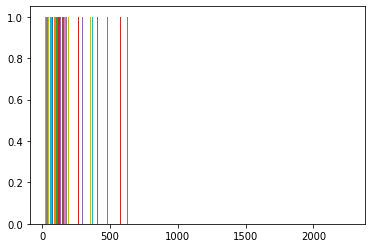

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
countkk = plt.hist(original_data)
plt.show()

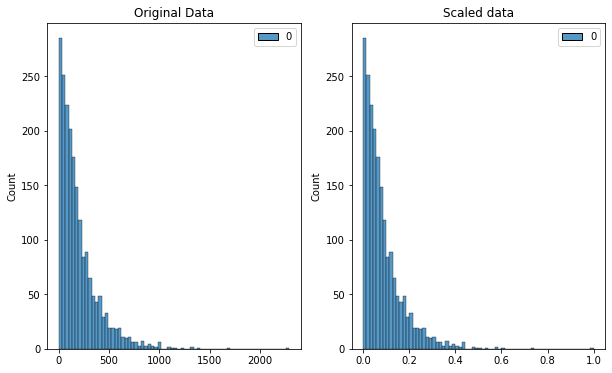

In [18]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method you will be using to normalize here is called the Normalizer method from sklearn. Let's take a quick peek at what normalizing some data looks like:

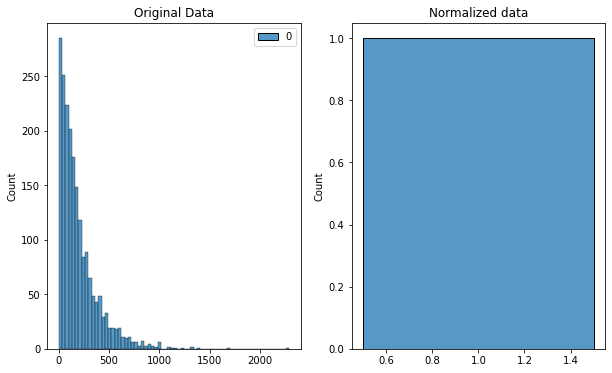

In [19]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [20]:
# check datatypes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            149429 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg Bearer TP DL (kbps)         150001 non-null  float64
 11  Avg Bearer TP UL (kbps)         150001 non-null  float64
 12  DL TP < 50 Kbps 

### Utility Functions

In [21]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    
    return df[bytes_data]
  
def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]
###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()
pd.options.display.float_format = format_float

### Extracting Data

In [22]:
db['Activity Duration DL (ms)'].value_counts()

0.00            7278
1.00              21
636.00            13
508.00            13
2.00              13
                ... 
5,457,919.00       1
7,378.00           1
2,728,971.00       1
682,243.00         1
14,758.00          1
Name: Activity Duration DL (ms), Length: 102560, dtype: int64

In [23]:
percent_missing(df_clean)

The Telcom dataset contains 0.1 % missing values.


In [24]:
df_clean.isna().sum()

Bearer Id                           0
Start                               0
Start ms                            0
End                                 0
End ms                              0
Dur. (ms)                           0
IMSI                                0
MSISDN/Number                       0
IMEI                              572
Last Location Name                  0
Avg Bearer TP DL (kbps)             0
Avg Bearer TP UL (kbps)             0
DL TP < 50 Kbps (%)               754
50 Kbps < DL TP < 250 Kbps (%)    754
250 Kbps < DL TP < 1 Mbps (%)     754
DL TP > 1 Mbps (%)                754
UL TP < 10 Kbps (%)               792
10 Kbps < UL TP < 50 Kbps (%)     792
50 Kbps < UL TP < 300 Kbps (%)    792
UL TP > 300 Kbps (%)              792
Activity Duration DL (ms)           1
Activity Duration UL (ms)           1
Dur. (ms).1                         0
Handset Manufacturer                0
Handset Type                        0
Nb of sec with Vol DL < 6250B       0
Nb of sec wi

In [25]:
df_clean['IMEI'] = df_clean['IMEI'].fillna(df_clean['IMEI'].mode()[0])
df_clean['DL TP < 50 Kbps (%)'] = df_clean['DL TP < 50 Kbps (%)'].fillna(df_clean['DL TP < 50 Kbps (%)'].mode()[0])
df_clean['50 Kbps < DL TP < 250 Kbps (%)'] = df_clean['50 Kbps < DL TP < 250 Kbps (%)'].fillna(df_clean['50 Kbps < DL TP < 250 Kbps (%)'].mode()[0])
df_clean['250 Kbps < DL TP < 1 Mbps (%)'] = df_clean['250 Kbps < DL TP < 1 Mbps (%)'].fillna(df_clean['250 Kbps < DL TP < 1 Mbps (%)'].mode()[0])
df_clean['DL TP > 1 Mbps (%)'] = df_clean['DL TP > 1 Mbps (%)'].fillna(df_clean['DL TP > 1 Mbps (%)'].mode()[0])
df_clean['UL TP < 10 Kbps (%)'] = df_clean['UL TP < 10 Kbps (%)'].fillna(df_clean['UL TP < 10 Kbps (%)'].mode()[0])

df_clean['10 Kbps < UL TP < 50 Kbps (%)'] = df_clean['10 Kbps < UL TP < 50 Kbps (%)'].fillna(df_clean['10 Kbps < UL TP < 50 Kbps (%)'].mode()[0])
df_clean['50 Kbps < UL TP < 300 Kbps (%)'] = df_clean['50 Kbps < UL TP < 300 Kbps (%)'].fillna(df_clean['50 Kbps < UL TP < 300 Kbps (%)'].mode()[0])
df_clean['UL TP > 300 Kbps (%)'] = df_clean['UL TP > 300 Kbps (%)'].fillna(df_clean['UL TP > 300 Kbps (%)'].mode()[0])
df_clean['Activity Duration DL (ms)'] = df_clean['Activity Duration DL (ms)'].fillna(df_clean['Activity Duration DL (ms)'].mode()[0])
df_clean['Activity Duration UL (ms)'] = df_clean['Activity Duration UL (ms)'].fillna(df_clean['Activity Duration UL (ms)'].mode()[0])


In [26]:
df_clean.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250B     0
Nb of sec with Vol UL < 1250B     0
Social Media DL (Bytes)     

In [27]:
percent_missing(df_clean)

The Telcom dataset contains 0.0 % missing values.


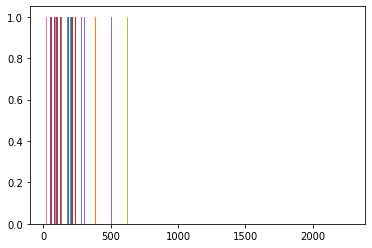

In [28]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

In [29]:
missing_values_table(df_clean)

Your selected dataframe has 43 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


In [30]:
df_clean.shape

(150001, 43)

In [31]:
pd.set_option('max_column', None)
df = pd.read_excel("/content/gdrive/MyDrive/Week-1/data/Week1_challenge_data_source.xlsx", engine = 'openpyxl')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.00,2019-04-25 14:35:31,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9164566995485190,42.00,5.00,23.00,44.00,nan,nan,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,nan,nan,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,nan,nan,nan,nan,nan,nan,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,13114483482878900224,2019-04-09 13:04:04,235.00,2019-04-25 08:15:48,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,nan,nan,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,nan,nan,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),nan,nan,nan,nan,nan,nan,971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,13114483484080500736,2019-04-09 17:42:11,1.00,2019-04-25 11:58:13,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,nan,nan,6.00,9.00,nan,nan,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,nan,nan,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),nan,nan,nan,nan,nan,nan,751.00,695.00,"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,13114483485442799616,2019-04-10 00:31:25,486.00,2019-04-25 07:36:35,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,nan,nan,44.00,44.00,nan,nan,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,nan,nan,"3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,nan,nan,nan,nan,nan,nan,17.00,207.00,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,13114483499480700928,2019-04-12 20:10:23,565.00,2019-04-25 10:40:32,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,nan,nan,6.00,9.00,nan,nan,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,nan,nan,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,nan,nan,nan,nan,nan,nan,607.00,604.00,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","18,962,873.00"

In [32]:
db['Handset Manufacturer'].value_counts()

Apple                                                59565
Samsung                                              40839
Huawei                                               34423
undefined                                             8987
Sony Mobile Communications Ab                          980
                                                     ...  
Shenzhen Kelly The Communication Equipment Co Ltd        1
Essential Products Inc.                                  1
Lephone                                                  1
Quanta                                                   1
Shenzhen Gaoxinqi                                        1
Name: Handset Manufacturer, Length: 170, dtype: int64

In [33]:
db['Handset Type'].value_counts()

Huawei B528S-23A                                                           19752
Apple iPhone 6S (A1688)                                                     9419
Apple iPhone 6 (A1586)                                                      9023
undefined                                                                   8987
Apple iPhone 7 (A1778)                                                      6326
                                                                           ...  
Kenxinda V7                                                                    1
Vastking Technol. Vastking M750                                                1
Archos Sa Archos 45B Helium 50B Helium 50C Helium 50D Helium 50 Diamond        1
Shenzhen Xin Kin. V1600                                                        1
Lg Gt540                                                                       1
Name: Handset Type, Length: 1396, dtype: int64

Exploration

Data Exploration or Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics which include:

detection of mistakes, outliers or abnormalities
determining relationships among the explanatory variables
assessing the relationships between explanatory and outcome variables

In [34]:
dfExp = df_clean.copy()
dfExp


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),751.00,695.00,"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,44.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,17.00,207.00,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,607.00,604.00,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,"7,277,825,670,196,679,680.00",4/29/2019 7:28,451.00,4/30/2019 6:02,214.00,"81,230.00","208,202,201,200,072.00","33,650,688,697.00","35,483,109,451,938.00",D20434A,52.00,65.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"42,376.00","41,915.00","81,230,763.00",A

In [35]:
dfExp.dtypes

Bearer Id                         float64
Start                              object
Start ms                          float64
End                                object
End ms                            float64
Dur. (ms)                         float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              float64
Activity Duration DL (ms)         float64
Activity Duration UL (ms)         float64
Dur. (ms).1                       float64
Handset Manufacturer              

Univariate Analysis

This is mainly analysis done on particular variable only i.e we search for the data charecteristics of a variable with disregard to all the other columns

distributions

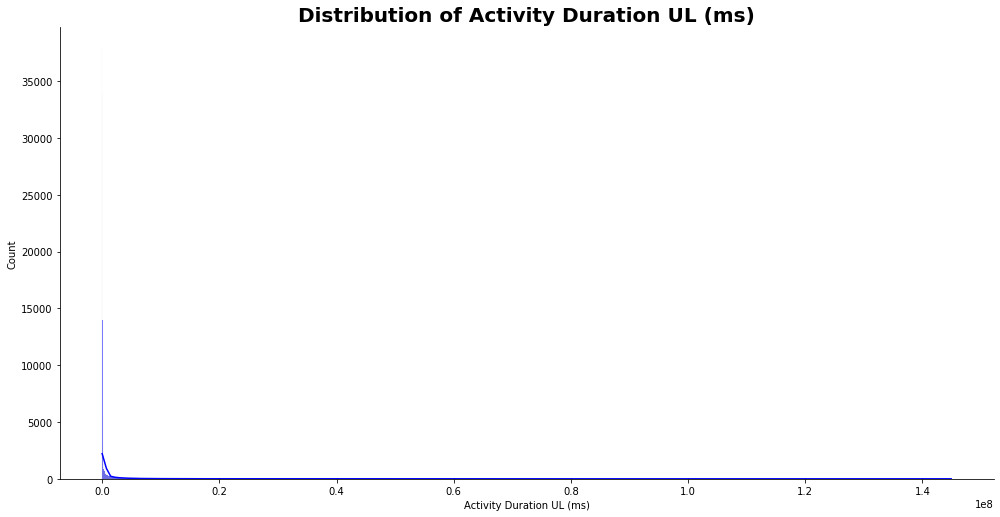

In [36]:
plot_hist(dfExp, "Activity Duration UL (ms)", "blue")

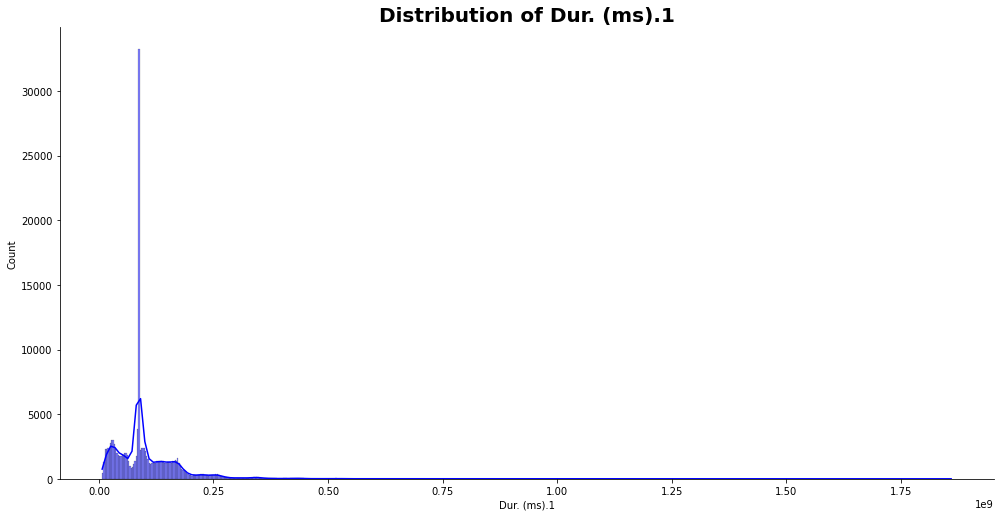

In [37]:
 plot_hist(dfExp, "Dur. (ms).1", "blue")

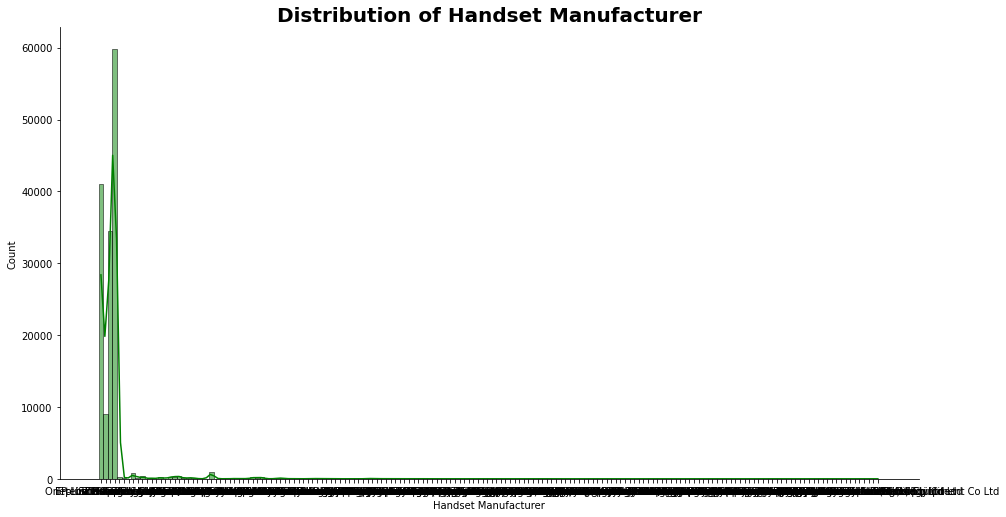

In [38]:
plot_hist(dfExp, "Handset Manufacturer", "green")

In [39]:
dfExp["Handset Manufacturer"].describe()

count     150001
unique       170
top        Apple
freq       59826
Name: Handset Manufacturer, dtype: object

In [40]:
dfExp["Activity Duration UL (ms)"].describe()

count       150,001.00
mean      1,408,870.58
std       4,643,216.55
min               0.00
25%          21,539.00
50%          46,793.00
75%         599,089.00
max     144,911,293.00
Name: Activity Duration UL (ms), dtype: float64

In [41]:
 dfExp["Dur. (ms).1"].describe()

count         150,001.00
mean      104,609,060.89
std        81,037,343.30
min         7,142,988.00
25%        57,442,058.00
50%        86,399,983.00
75%       132,430,686.00
max     1,859,336,442.00
Name: Dur. (ms).1, dtype: float64

## Outliers


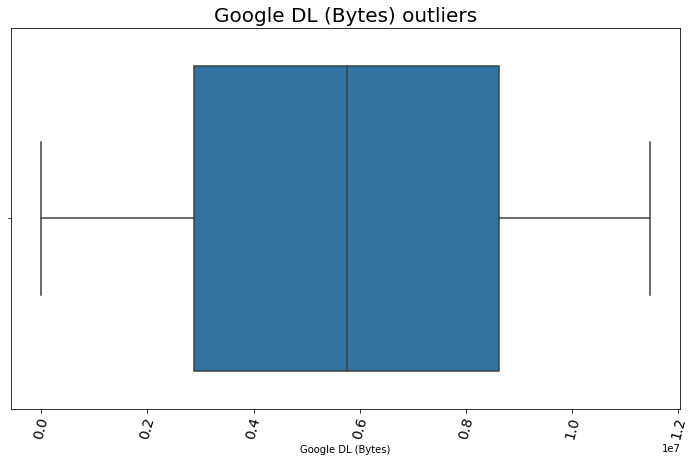

In [42]:
plot_box(dfExp, "Google DL (Bytes)", "Google DL (Bytes) outliers")

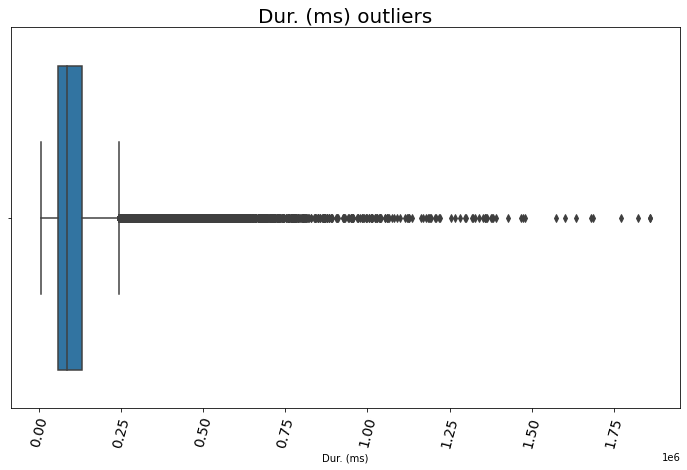

In [43]:
plot_box(dfExp, "Dur. (ms)", "Dur. (ms) outliers")

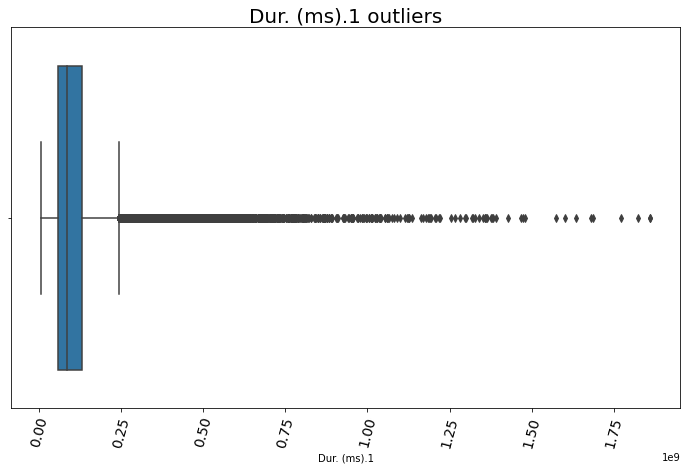

In [44]:
 plot_box(dfExp, "Dur. (ms).1", "Dur. (ms).1 outliers")

In [45]:
dfExp["fixed_Dur. (ms).1"] = fix_outlier(dfExp, "Dur. (ms).1")

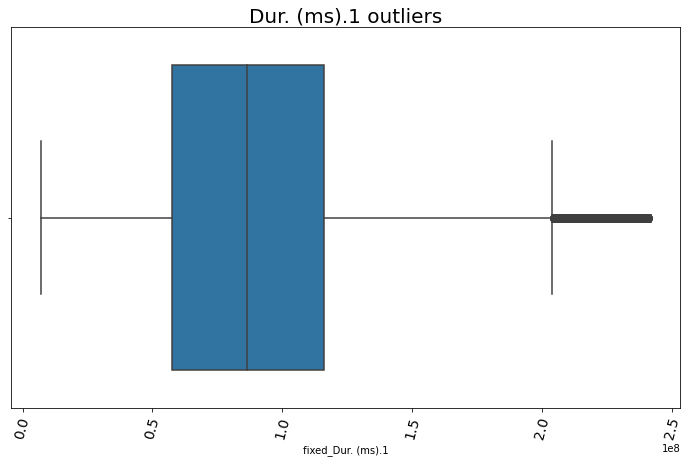

In [46]:
plot_box(dfExp, "fixed_Dur. (ms).1", "Dur. (ms).1 outliers")

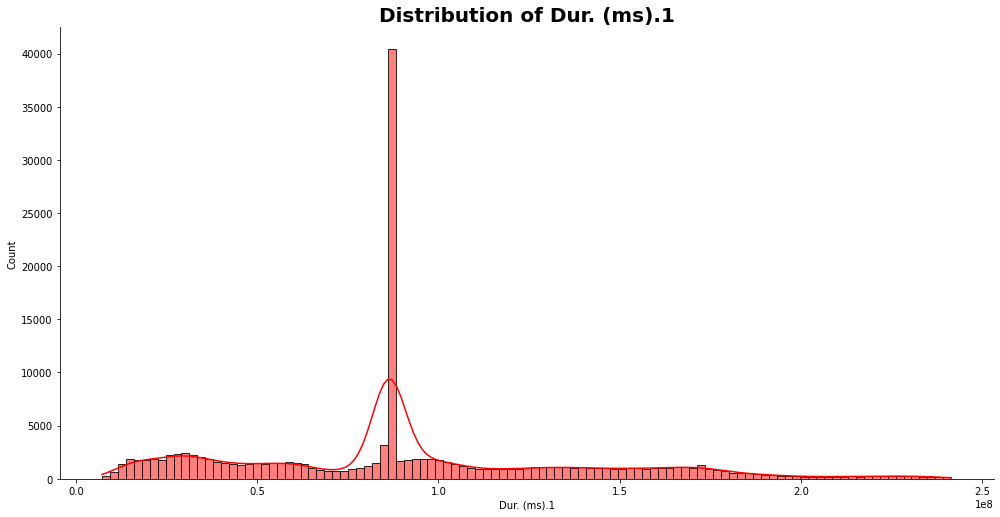

In [47]:
plot_hist(dfExp, "Dur. (ms).1", "red")

In [48]:
dfExp["fixed_Dur. (ms).1"].describe()

count       150,001.00
mean     91,650,515.91
std      48,802,347.21
min       7,142,988.00
25%      57,442,058.00
50%      86,399,983.00
75%     115,969,818.00
max     241,538,150.00
Name: fixed_Dur. (ms).1, dtype: float64

categorical variables

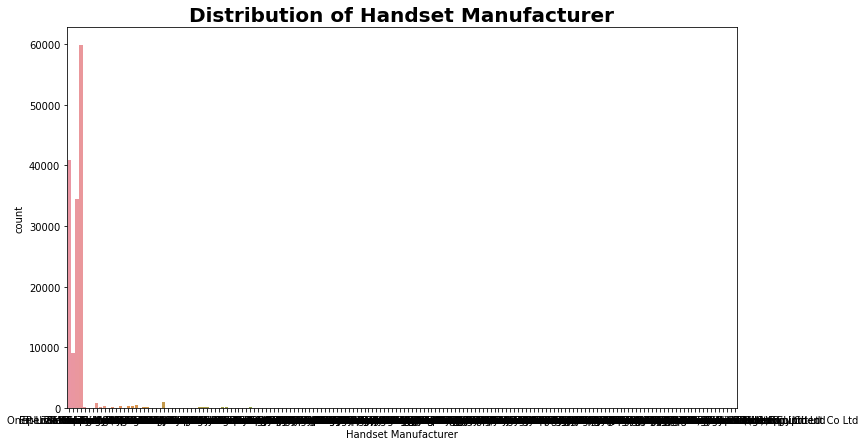

In [49]:
plot_count(dfExp, "Handset Manufacturer")

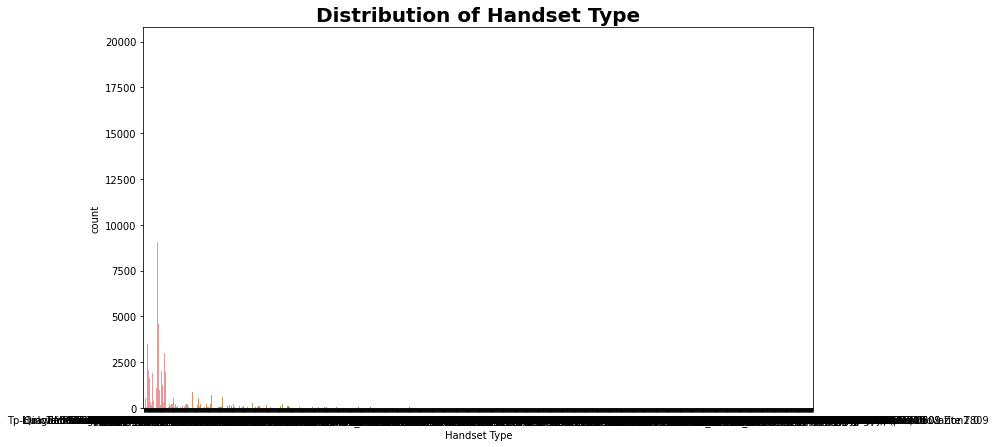

In [50]:
plot_count(dfExp, "Handset Type")

In [51]:
items_counts = df['Handset Type'].value_counts()
max_item = items_counts.max()

Multivariate Analysis

This analysis that mainly done on two or more columns where we look for relationships between columns and how our data is distributed amoung values in multiple columns

scatter plots

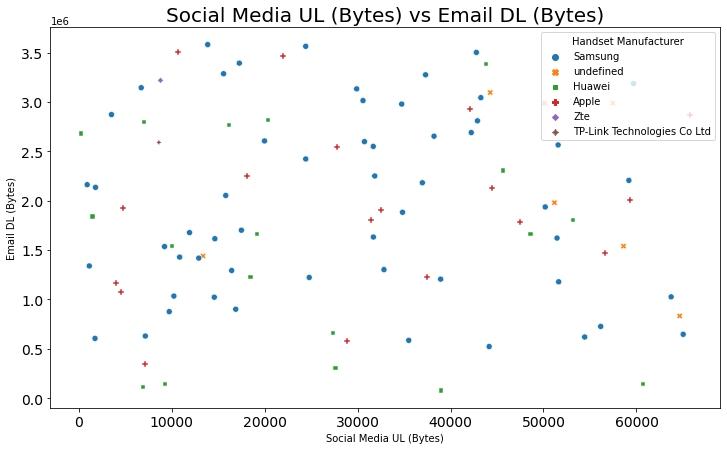

In [52]:
plot_scatter(dfExp.head(100), x_col="Social Media UL (Bytes)", y_col= "Email DL (Bytes)", hue="Handset Manufacturer",
             style="Handset Manufacturer", title="Social Media UL (Bytes) vs Email DL (Bytes)")

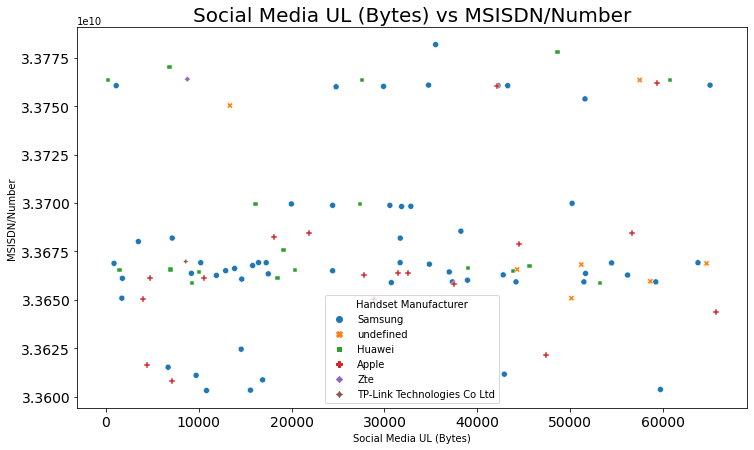

In [53]:
plot_scatter(dfExp.head(100), x_col="Social Media UL (Bytes)", y_col= "MSISDN/Number", hue="Handset Manufacturer",
             style="Handset Manufacturer", title="Social Media UL (Bytes) vs MSISDN/Number")

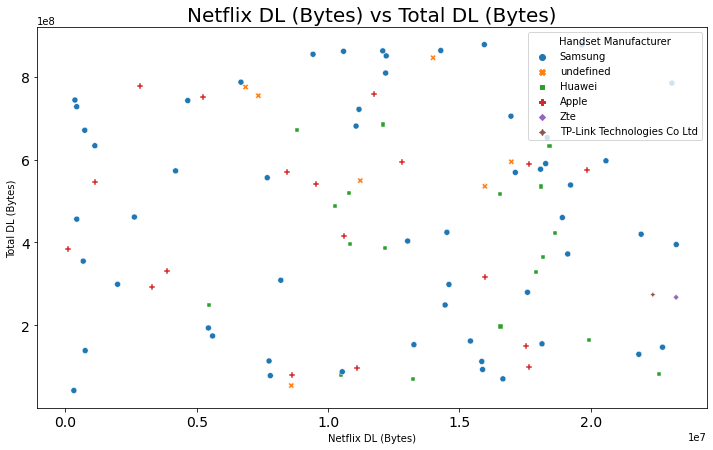

In [54]:
plot_scatter(dfExp.head(100), x_col="Netflix DL (Bytes)", y_col= "Total DL (Bytes)", hue="Handset Manufacturer",
             style="Handset Manufacturer", title="Netflix DL (Bytes) vs Total DL (Bytes)")

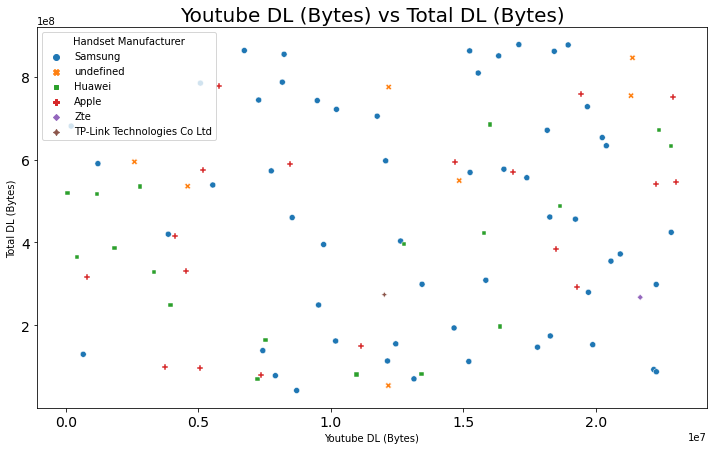

In [58]:
plot_scatter(dfExp.head(100), x_col="Youtube DL (Bytes)", y_col= "Total DL (Bytes)", hue="Handset Manufacturer",
             style="Handset Manufacturer", title="Youtube DL (Bytes) vs Total DL (Bytes)")

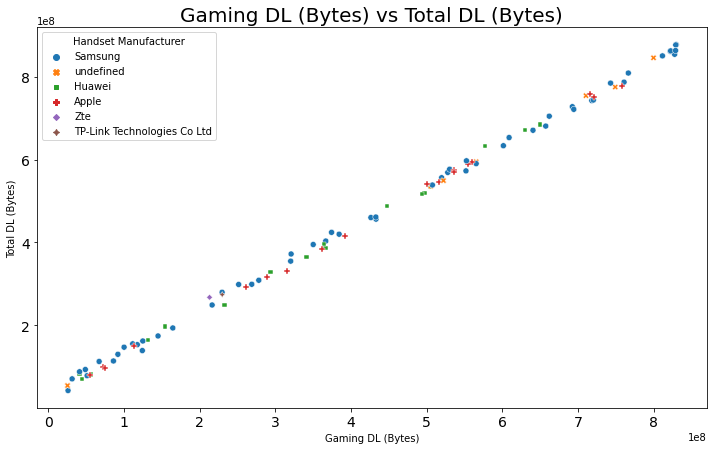

In [59]:
plot_scatter(dfExp.head(100), x_col="Gaming DL (Bytes)", y_col= "Total DL (Bytes)", hue="Handset Manufacturer",
             style="Handset Manufacturer", title="Gaming DL (Bytes) vs Total DL (Bytes)")

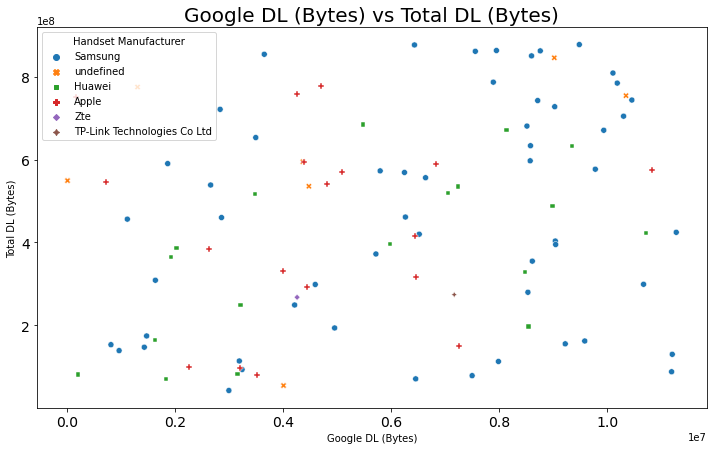

In [60]:
plot_scatter(dfExp.head(100), x_col="Google DL (Bytes)", y_col= "Total DL (Bytes)", hue="Handset Manufacturer",
             style="Handset Manufacturer", title="Google DL (Bytes) vs Total DL (Bytes)")

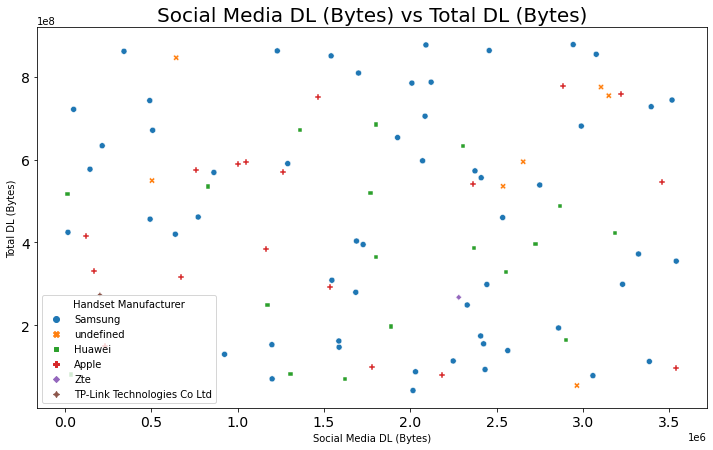

In [61]:
plot_scatter(dfExp.head(100), x_col="Social Media DL (Bytes)", y_col= "Total DL (Bytes)", hue="Handset Manufacturer",
             style="Handset Manufacturer", title="Social Media DL (Bytes) vs Total DL (Bytes)")

Box Plots

In [55]:
#plot_box_multi(dfExp, x_col="Dur. (ms).1", y_col="Total DL (Bytes)", title="Dura outilers in Handset Manufacturer column") 

pair plots
pair plots also known as scatterplot matrix, they allow us to see both distributions of single columns and the relationship between two columns

In [56]:
dfPair = dfExp[["Handset Manufacturer", "Dur. (ms).1", "Social Media UL (Bytes)", "Email DL (Bytes)", "Total DL (Bytes)", "fixed_Dur. (ms).1"]]

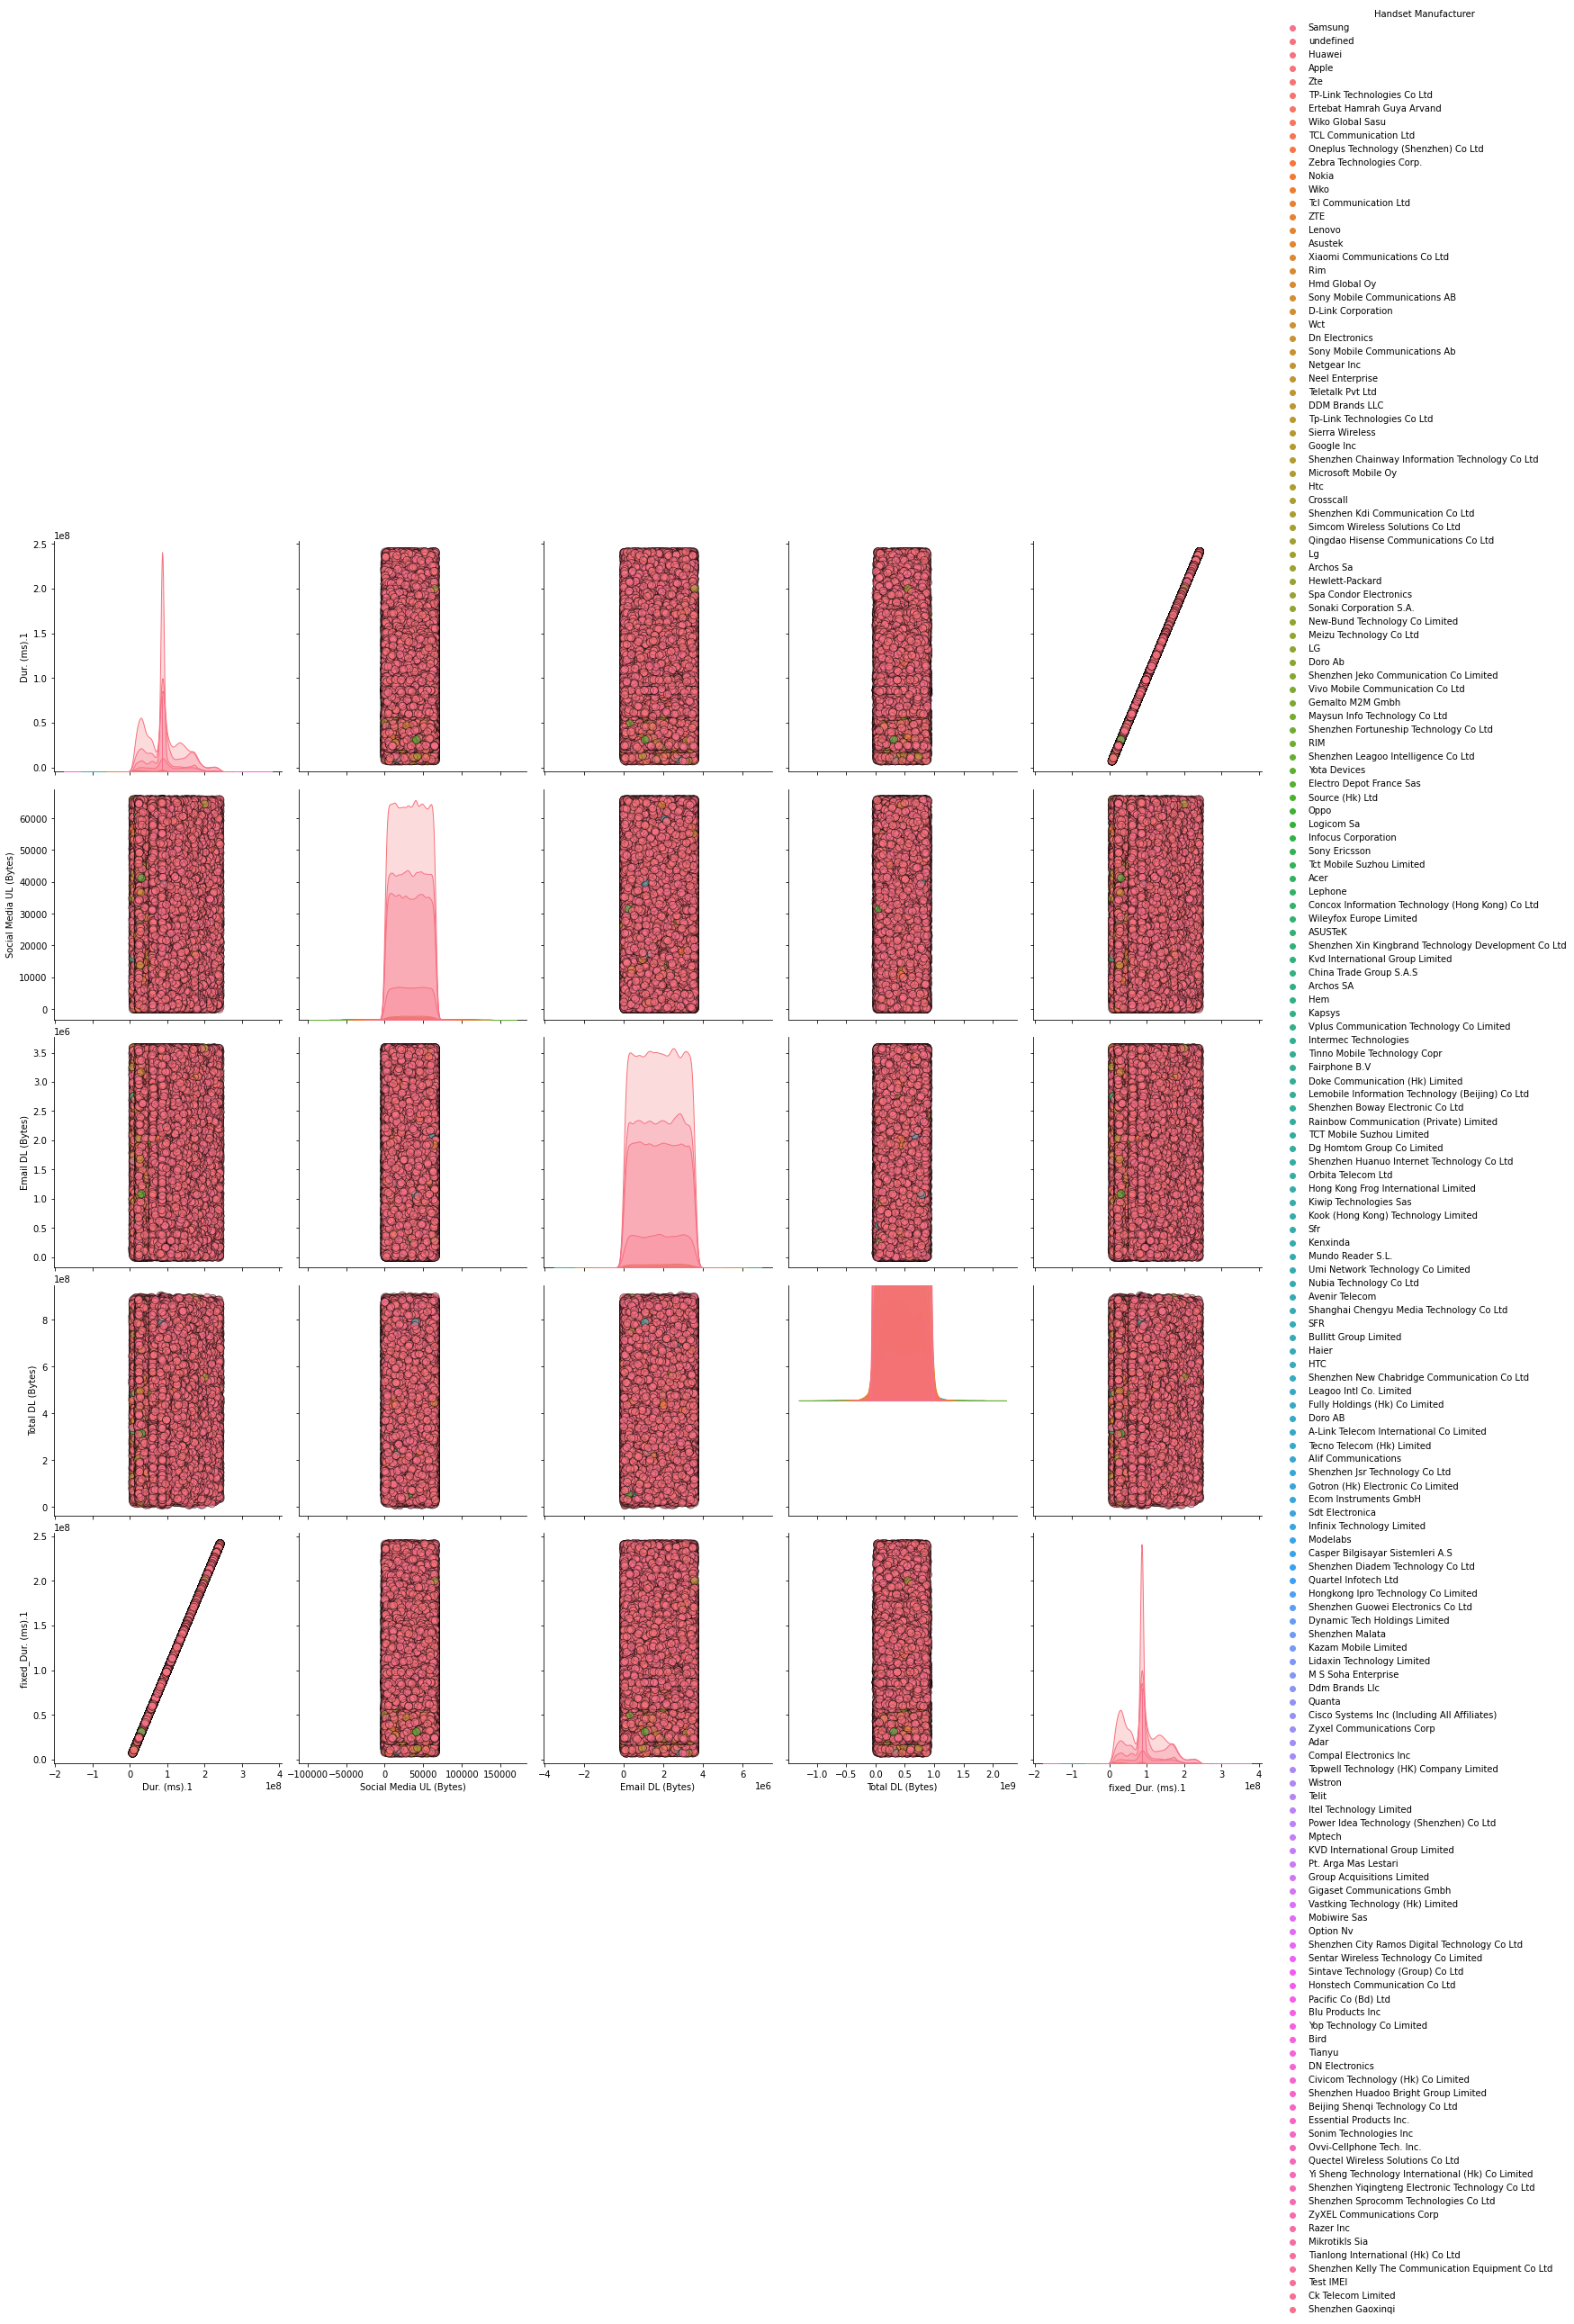

In [57]:
sns.pairplot(dfPair, hue = 'Handset Manufacturer', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)